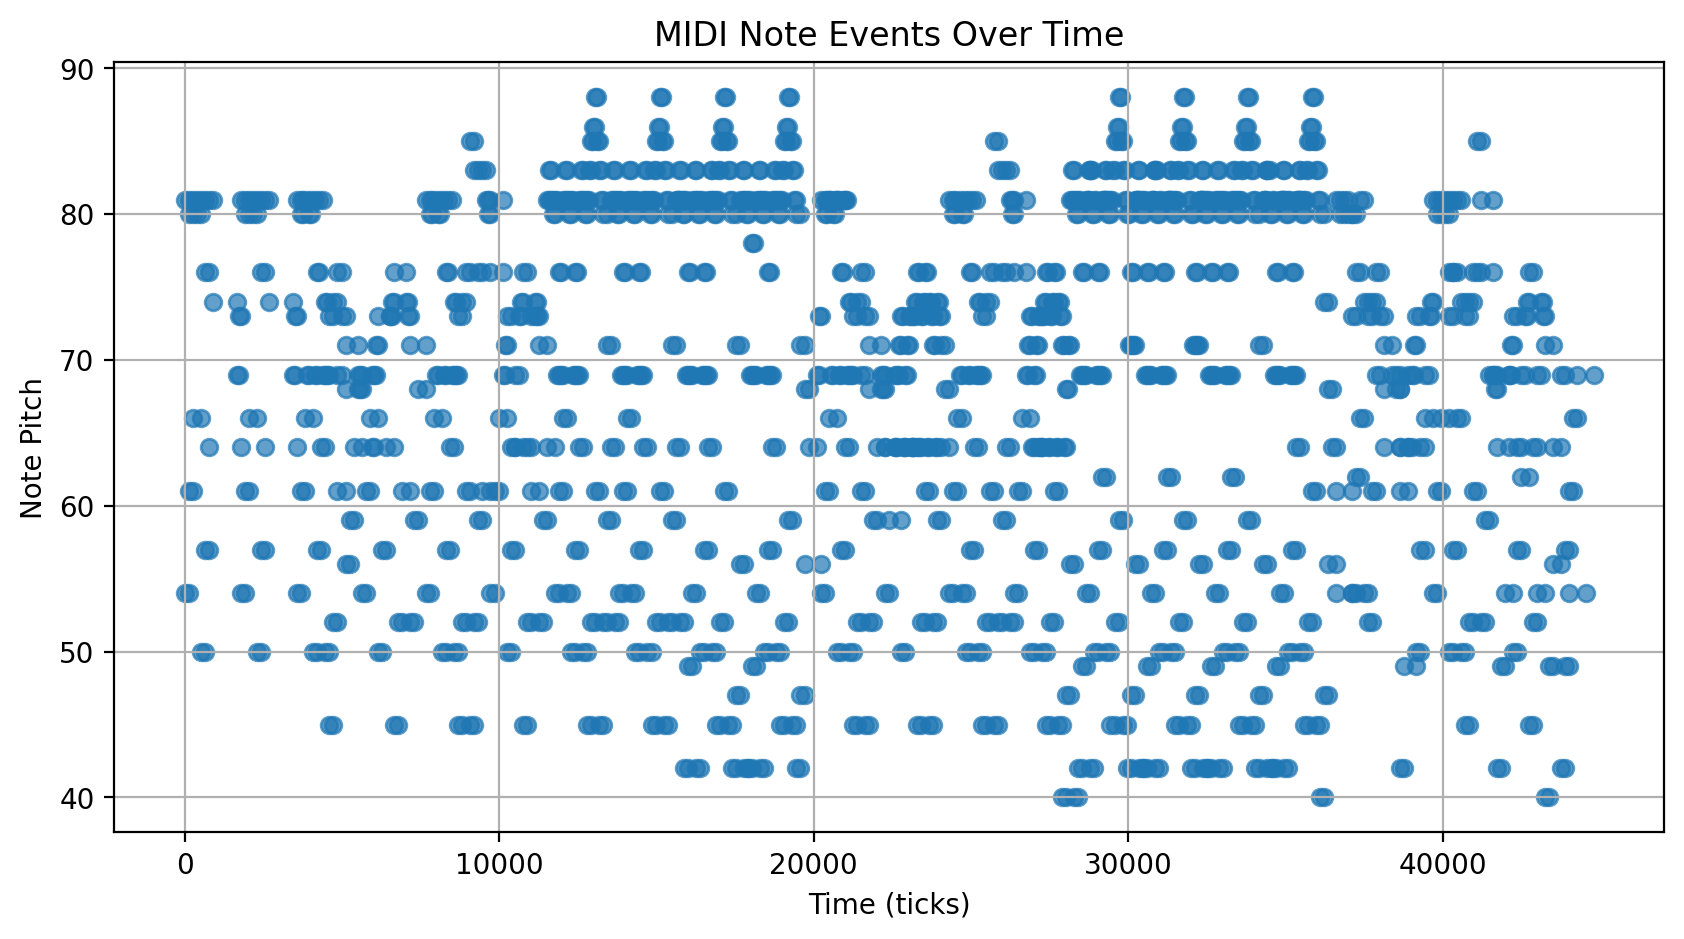

In [26]:
import mido
import matplotlib.pyplot as plt

# Load your MIDI file
midi_file = mido.MidiFile('./green-hill-zone.mid')

# Initialize lists to store timestamps and note pitches
timestamps = []
notes = []

# Process each track in the MIDI file
for track in midi_file.tracks:
    time = 0
    for msg in track:
        time += msg.time
        # Check if the message is a 'note_on' event
        if msg.type == 'note_on':
            timestamps.append(time)
            notes.append(msg.note)

# Plotting
plt.figure(figsize=(10, 5))
plt.scatter(timestamps, notes, alpha=0.7)
plt.title('MIDI Note Events Over Time')
plt.xlabel('Time (ticks)')
plt.ylabel('Note Pitch')
plt.grid(True)
plt.show()


[0, 0, 128, 128, 128, 128, 256, 256, 256, 256, 384, 384, 512, 512, 512, 512, 640, 640, 640, 640]
[81, 54, 81, 54, 80, 61, 80, 61, 81, 66, 81, 80, 80, 66, 81, 50, 81, 50, 76, 57]


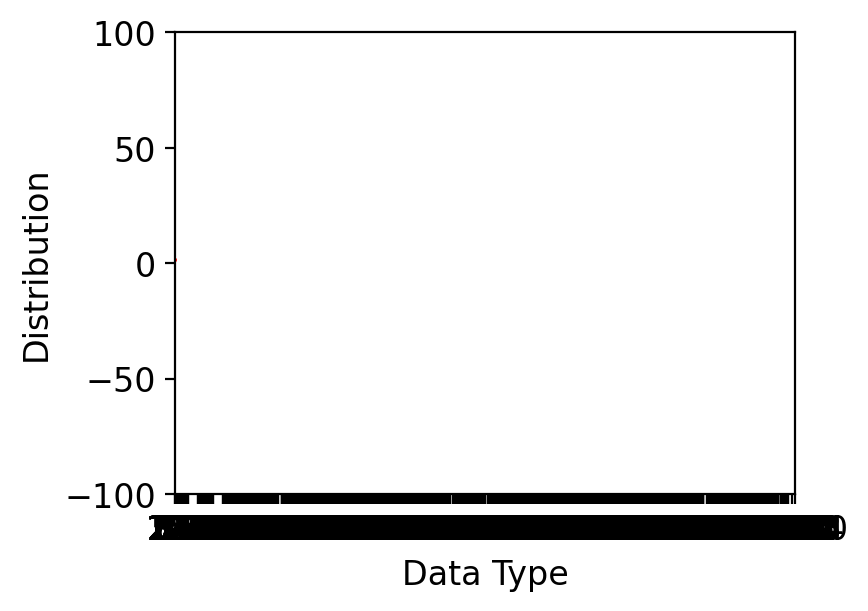

In [47]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np


# 3. 그래프 그리기
fig, ax = plt.subplots()




# Initialize lists to store timestamps and note pitches
timestamps = []
notes = []


# Process each track in the MIDI file
for track in midi_file.tracks:
    time = 0
    for msg in track:
        time += msg.time
        # Check if the message is a 'note_on' event
        if msg.type == 'note_on':
            timestamps.append(time)
            notes.append(msg.note)

print(timestamps[:20])
print(notes[:20])
        
ax.set_ylim(-100.0, 100.0)
ax.set_xticks(timestamps)
ax.set_xlabel('Data Type')
ax.set_ylabel('Distribution')            

# 4. 사각형 그리기
ax.add_patch(
   patches.Rectangle(
      (1.8, 1.0),                   # (x, y)
      0.4, 1.5,                     # width, height
      edgecolor = 'red',
      facecolor = 'blue',
      fill=True,
   ))

plt.show()



In [48]:
def midi_to_dataframe(file_path):
    mid = mido.MidiFile(file_path)

    columns = ['Sec', 'Ticks', 'msg_type', 'Channel', 'Notes', 'Velocities', 'Tempo', 'mean_velocity', 'diff_velocity']
    midi_df = pd.DataFrame(columns=columns)

    current_notes = []
    current_velocities = []
    current_tempo = None
    current_ticks = None
    current_time = 0
    current_msg_type = []
    prev_notes = []
    prev_velocities = []

    for msg in mid:
        if msg.type in ['note_on', 'note_off']:
            if msg.time > 0:
                # 이전 노트 및 velocity의 평균 계산
                prev_avg_velocity = sum(prev_velocities) / len(prev_velocities) if prev_velocities else 0

                # 변화 속도 및 평균 속도 계산
                if len(current_velocities) > 0:  # 노트가 있는 경우에만 계산
                    diff_velocity = sum(current_velocities) / len(current_velocities) - prev_avg_velocity
                    mean_velocity = sum(current_velocities) / len(current_velocities)
                else:
                    diff_velocity = 0  # 없으면 0으로 처리
                    mean_velocity = 0

                if current_msg_type:
                    midi_df = pd.concat([midi_df, pd.DataFrame([[current_time, current_ticks, current_msg_type, msg.channel, current_notes,
                                                                 current_velocities, current_tempo, diff_velocity, mean_velocity]], columns=columns)], ignore_index=True)

                prev_notes = current_notes.copy()
                prev_velocities = current_velocities.copy()

                current_notes = []
                current_velocities = []
                current_msg_type = []

            current_notes.append(msg.note)
            current_velocities.append(msg.velocity)
            current_msg_type.append(msg.type)

        elif msg.type == 'set_tempo':
            current_tempo = mido.tempo2bpm(msg.tempo)  # 템포 정보 업데이트

        current_ticks = msg.time

        current_time += msg.time

    # 마지막 노트들을 처리
    if current_notes and current_msg_type:
        prev_avg_velocity = sum(prev_velocities) / len(prev_velocities) if prev_velocities else 0
        if len(current_velocities) > 0:  # 노트가 있는 경우에만 계산
            diff_velocity = sum(current_velocities) / len(current_velocities) - prev_avg_velocity
            mean_velocity = sum(current_velocities) / len(current_velocities)
        else:
            diff_velocity = 0
            mean_velocity = 0

        midi_df = pd.concat([midi_df, pd.DataFrame([[current_time, current_ticks, current_msg_type, '', current_notes,
                                                     current_velocities, current_tempo, diff_velocity, mean_velocity]], columns=columns)], ignore_index=True)

    return midi_df

In [51]:
midi_file_path = 'green-hill-zone2.mid'

result_df = midi_to_dataframe(midi_file_path)
result_df.to_csv('hello2.csv', index=False)

print(result_df)

            Sec     Ticks                                       msg_type  \
0             0         0                                      [note_on]   
1      0.082143  0.082143                                     [note_off]   
2      0.085714  0.003571                                      [note_on]   
3      0.167857  0.082143                                     [note_off]   
4      0.171428         0                    [note_on, note_on, note_on]   
...         ...       ...                                            ...   
1182  77.828539         0  [note_on, note_on, note_on, note_on, note_on]   
1183  77.996396         0                 [note_off, note_off, note_off]   
1184  77.999968         0                    [note_on, note_on, note_on]   
1185   78.08211         0                           [note_off, note_off]   
1186  78.167825         0       [note_off, note_off, note_off, note_off]   

     Channel                 Notes             Velocities       Tempo  \
0          0  

In [56]:
import pandas as pd

df = pd.read_csv('hello1.csv')


In [59]:
print(df.head())
print(df.axes)

        Sec  Ticks                                      msg_type  Channel  \
0  0.000000    0.0                        ['note_on', 'note_on']      0.0   
1  0.461537    0.0  ['note_on', 'note_on', 'note_on', 'note_on']      0.0   
2  0.923075    0.0  ['note_on', 'note_on', 'note_on', 'note_on']      0.0   
3  1.384613    0.0                        ['note_on', 'note_on']      0.0   
4  1.846150    0.0  ['note_on', 'note_on', 'note_on', 'note_on']      0.0   

              Notes      Velocities      Tempo  mean_velocity  diff_velocity  
0          [81, 54]        [70, 72]  65.000135          71.00          71.00  
1  [81, 54, 80, 61]  [0, 0, 71, 88]  65.000135         -31.25          39.75  
2  [80, 61, 81, 66]  [0, 0, 79, 90]  65.000135           2.50          42.25  
3          [81, 80]         [0, 68]  65.000135          -8.25          34.00  
4  [80, 66, 81, 50]  [0, 0, 75, 65]  65.000135           1.00          35.00  
[RangeIndex(start=0, stop=521, step=1), Index(['Sec', 'Ticks', 

In [60]:
print(df[:5])

        Sec  Ticks                                      msg_type  Channel  \
0  0.000000    0.0                        ['note_on', 'note_on']      0.0   
1  0.461537    0.0  ['note_on', 'note_on', 'note_on', 'note_on']      0.0   
2  0.923075    0.0  ['note_on', 'note_on', 'note_on', 'note_on']      0.0   
3  1.384613    0.0                        ['note_on', 'note_on']      0.0   
4  1.846150    0.0  ['note_on', 'note_on', 'note_on', 'note_on']      0.0   

              Notes      Velocities      Tempo  mean_velocity  diff_velocity  
0          [81, 54]        [70, 72]  65.000135          71.00          71.00  
1  [81, 54, 80, 61]  [0, 0, 71, 88]  65.000135         -31.25          39.75  
2  [80, 61, 81, 66]  [0, 0, 79, 90]  65.000135           2.50          42.25  
3          [81, 80]         [0, 68]  65.000135          -8.25          34.00  
4  [80, 66, 81, 50]  [0, 0, 75, 65]  65.000135           1.00          35.00  


In [61]:
print(df['Notes'][:5])

0            [81, 54]
1    [81, 54, 80, 61]
2    [80, 61, 81, 66]
3            [81, 80]
4    [80, 66, 81, 50]
Name: Notes, dtype: object


In [62]:
print(max(df['Sec']))

164.77394462499913


In [68]:
time = np.arange(0, 165, 0.1)
note = np.arange(0, 165, 0.1)

print(time)

[0.000e+00 1.000e-01 2.000e-01 ... 1.647e+02 1.648e+02 1.649e+02]


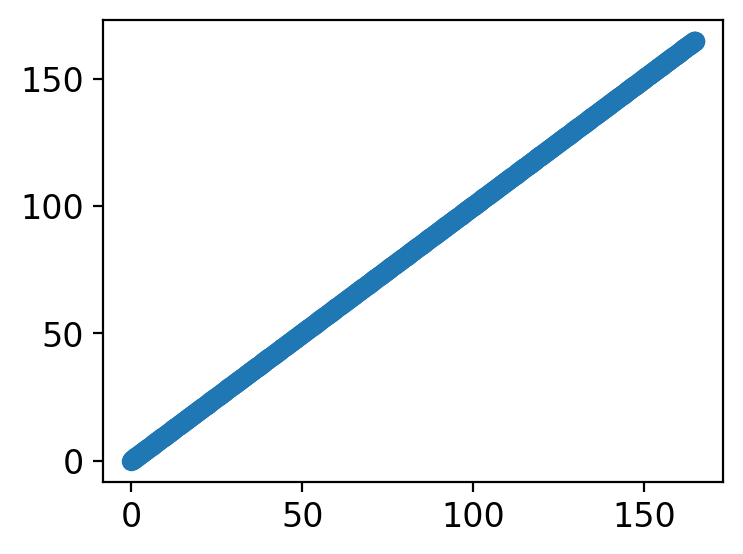

In [70]:
import matplotlib.pyplot as plt 


fig, ax = plt.subplots()

plt.scatter(time, note)
plt.show()

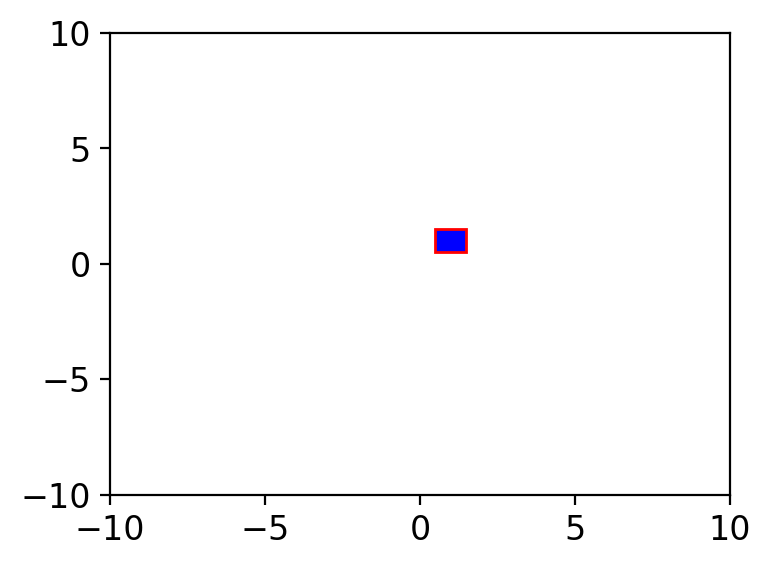

In [78]:




fig, ax = plt.subplots()

ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)

# 4. 사각형 그리기
ax.add_patch(
   patches.Rectangle(
      (0.5, 0.5),                   # (x, y)
      1.0, 1.0,                     # width, height
      edgecolor = 'red',
      facecolor = 'blue',
      fill=True,
   ))

plt.show()

In [79]:
print(result_df)

            Sec     Ticks                                       msg_type  \
0             0         0                                      [note_on]   
1      0.082143  0.082143                                     [note_off]   
2      0.085714  0.003571                                      [note_on]   
3      0.167857  0.082143                                     [note_off]   
4      0.171428         0                    [note_on, note_on, note_on]   
...         ...       ...                                            ...   
1182  77.828539         0  [note_on, note_on, note_on, note_on, note_on]   
1183  77.996396         0                 [note_off, note_off, note_off]   
1184  77.999968         0                    [note_on, note_on, note_on]   
1185   78.08211         0                           [note_off, note_off]   
1186  78.167825         0       [note_off, note_off, note_off, note_off]   

     Channel                 Notes             Velocities       Tempo  \
0          0  

In [80]:
result_df.to_csv('hello3.csv', index=False)

In [81]:
import pandas as pd

df = pd.read_csv('hello3.csv')

In [117]:
print(df['msg_type'][:5])
print(df['Sec'][:5])
print(df['Notes'][:5])

print(len(df))

# note on or off? 
# on == 1
# off == 0 
def noteOnOff(midi, index):
    if(midi['msg_type'][index][7:9] == 'on'):
        return 1
    else:
        return 0
    

0                          ['note_on']
1                         ['note_off']
2                          ['note_on']
3                         ['note_off']
4    ['note_on', 'note_on', 'note_on']
Name: msg_type, dtype: object
0    0.000000
1    0.082143
2    0.085714
3    0.167857
4    0.171428
Name: Sec, dtype: float64
0            [81]
1            [81]
2            [77]
3            [77]
4    [81, 33, 35]
Name: Notes, dtype: object
1187


In [163]:
# note_on 과 note_off를 통해서 사각형의 width를 구함. height은 1로 지정. 


'''
ax.add_patch(
   patches.Rectangle(
      (0.5, 0.5),                   # (x, y) => (x는 시간, y는 note 번호)
      1.0, 1.0,                     # width, height => (지속시간, 1)
      edgecolor = 'red',
      facecolor = 'blue',
      fill=True,
   ))
'''

on_off_time_list = []
on_off_time = []
time_index = [] # 노트 시작할 때 time_index
note = []

# 노트가 off 일 때  리스트를 초기화.

for i in range(0, len(df)):
    
    if(noteOnOff(df, i) == 0): # note off 일 때
        on_off_time.append(df['Sec'][i]) # note on 일 때
        on_off_time_list.append(on_off_time)
        on_off_time = [] 
        note.append(df['Notes'][i])
    else:
        on_off_time.append(df['Sec'][i]) # note on 일 때
        time_index.append(i)
        

        
print(on_off_time_list[:5])
print(len(on_off_time_list))
print(time_index[:5])

result = []

for time in on_off_time_list:
    if(len(time) == 2):
        result.append(time[1] - time[0])


print('사각형 넓이: ', result[:5])
print('노트: ',  note[:5])

print(len(result))
print(len(time_index))
print(len(note))

[[0.0, 0.0821428229166666], [0.0857142499999999, 0.1678570729166666], [0.1714284999999999, 0.2535713229166666], [0.25714275, 0.3392855729166666], [0.3428569999999999, 0.4249998229166666]]
731
[0, 2, 4, 6, 8]
사각형 넓이:  [0.0821428229166666, 0.0821428229166667, 0.08214282291666672, 0.08214282291666664, 0.08214282291666669]
노트:  ['[81]', '[77]', '[81]', '[77, 33, 35]', '[83]']
436
456
731


In [173]:
import matplotlib.pyplot as plt
import numpy as np


fig, ax = plt.subplots(figsize=(50, 50)) # 보기 좋게 표기를 위해

ax.set_xticks(np.arange(df['Sec'][len(df)-1]))
ax.set_yticks(np.arange(-1, 128))
ax.set_xlim(0, df['Sec'][len(df)-1]) # x 축의 범위는 0~미디 데이터의 끝까지. hello3.csv 기준 -> 78.16782457임.
ax.set_ylim(-1, 128) # y 축 범위는 note의 범위로 하자. 음계가 총 128개 이므로, 0~127임.


# 노트 그리는 함수
# time :  시작 지점
# duration : 건반이 눌린 길이
# note_num : 음계 번호
def draw_note(time, duration, note_num):
    ax.add_patch(
       patches.Rectangle(
          (time, note_num),                   # (time., note)
            duration, 1.0,                     # width, height
      edgecolor = 'red',
      facecolor = 'blue',
      fill=True,
       ))


for i in range(len(result)):
    # 4. 사각형 그리기
    ax.add_patch(
       patches.Rectangle(
          (df['Sec'][time_index[i]], 0.5),                   # (time., note)
            result[i], 1.0,                     # width, height
      edgecolor = 'red',
      facecolor = 'blue',
      fill=True,
       ))

plt.savefig('example(20240108).png')

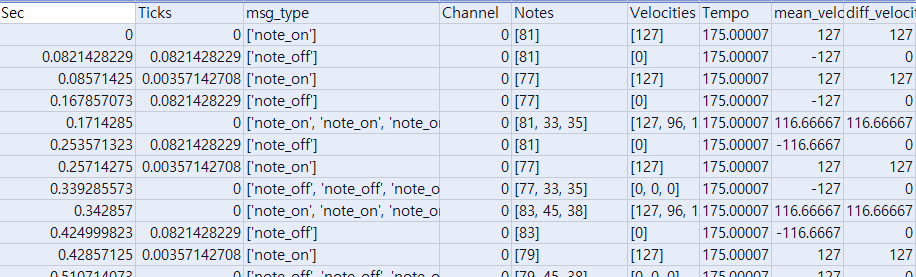

- 위 데이터를 시각화하는 것

- 먼저 이벤트가 발생했을 때 시간을 기록하고, 어떤 이벤트가 발생했는지 찍어져 있다. 어떤 노트가 찍혀 있고, 어떤 강도로 친건지? 
- 예를 들어, 0.082초에 note_off = 81번 노트위치에 피아노 건반에서 손을 떼고, 손을 뗀거니깐 -> velocity = 0 템포는 그대로

# 시각화를 위해
1. note_on 리스트를 통해 현재 켜져 있는 노트를 알아야 한다. 
2. x 축은 시간으로 하고, 시간은 유의미한 단위를 기준으로 해야한다.
3. y 축은 노트로 하고, 어느 위치를 치고 있는지 알아야 한다.

In [179]:
import matplotlib.pyplot as plt
import numpy as np


fig, ax = plt.subplots(figsize=(50, 50)) # 보기 좋게 표기를 위해

ax.set_xticks(np.arange(df['Sec'][len(df)-1]))
ax.set_yticks(np.arange(-1, 128))
ax.set_xlim(0, df['Sec'][len(df)-1]) # x 축의 범위는 0~미디 데이터의 끝까지. hello3.csv 기준 -> 78.16782457임.
ax.set_ylim(-1, 128) # y 축 범위는 note의 범위로 하자. 음계가 총 128개 이므로, 0~127임.


# 노트 그리는 함수
# time :  시작 지점
# duration : 건반이 눌린 길이
# note_num : 음계 번호
def draw_note(time, duration, note_num):
    ax.add_patch(
       patches.Rectangle(
          (time, note_num),                   # (time., note)
            duration, 1.0,                     # width, height
      edgecolor = 'red',
      facecolor = 'blue',
      fill=True,
       ))
# note on or off? 
# on == 1
# off == 0 
def noteOnOff(midi, index):
    if(midi['msg_type'][index][7:9] == 'on'):
        return 1
    else:
        return 0

# 시각화를 위한 데이터 정제
- 음계마다 시작지점을 뺴와야 함.
- 음계의 길이를 알아야 함.
- 음계를 알아야함.

In [229]:
df.info()
df['Notes'].to_list()

Notes = df['Notes'].to_list()
Sec = df['Sec']
velocities = df['Velocities'].to_list()
msg_type = df['msg_type'].to_list()

print('Data---------------')
print(Notes[:5])
print(Sec[:5])
print(velocities[:5])
print(msg_type[:5])
print(on_off_time_list[:5]) #Sec -> note_on, note_off
print(note_list[:5]) # note_on 일 때 -> Note

print(type(Notes))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1187 entries, 0 to 1186
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sec            1187 non-null   float64
 1   Ticks          1187 non-null   float64
 2   msg_type       1187 non-null   object 
 3   Channel        1186 non-null   float64
 4   Notes          1187 non-null   object 
 5   Velocities     1187 non-null   object 
 6   Tempo          1187 non-null   float64
 7   mean_velocity  1187 non-null   float64
 8   diff_velocity  1187 non-null   float64
dtypes: float64(6), object(3)
memory usage: 83.6+ KB
Data---------------
['[81]', '[81]', '[77]', '[77]', '[81, 33, 35]']
0    0.000000
1    0.082143
2    0.085714
3    0.167857
4    0.171428
Name: Sec, dtype: float64
['[127]', '[0]', '[127]', '[0]', '[127, 96, 127]']
["['note_on']", "['note_off']", "['note_on']", "['note_off']", "['note_on', 'note_on', 'note_on']"]
[[0.0, 0.0821428229166666], [0.0857142499

In [230]:
note_list = []
for i in Notes:
    i = i.to_list()
    for j in i:
        note_list.append(j)
print(set(note_list))

AttributeError: 'str' object has no attribute 'to_list'

In [232]:
import roll

C:\ProgramData\anaconda3\envs\my_ai\lib\site-packages\ipykernel_launcher.py:12: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  if sys.path[0] == "":
C:\ProgramData\anaconda3\envs\my_ai\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


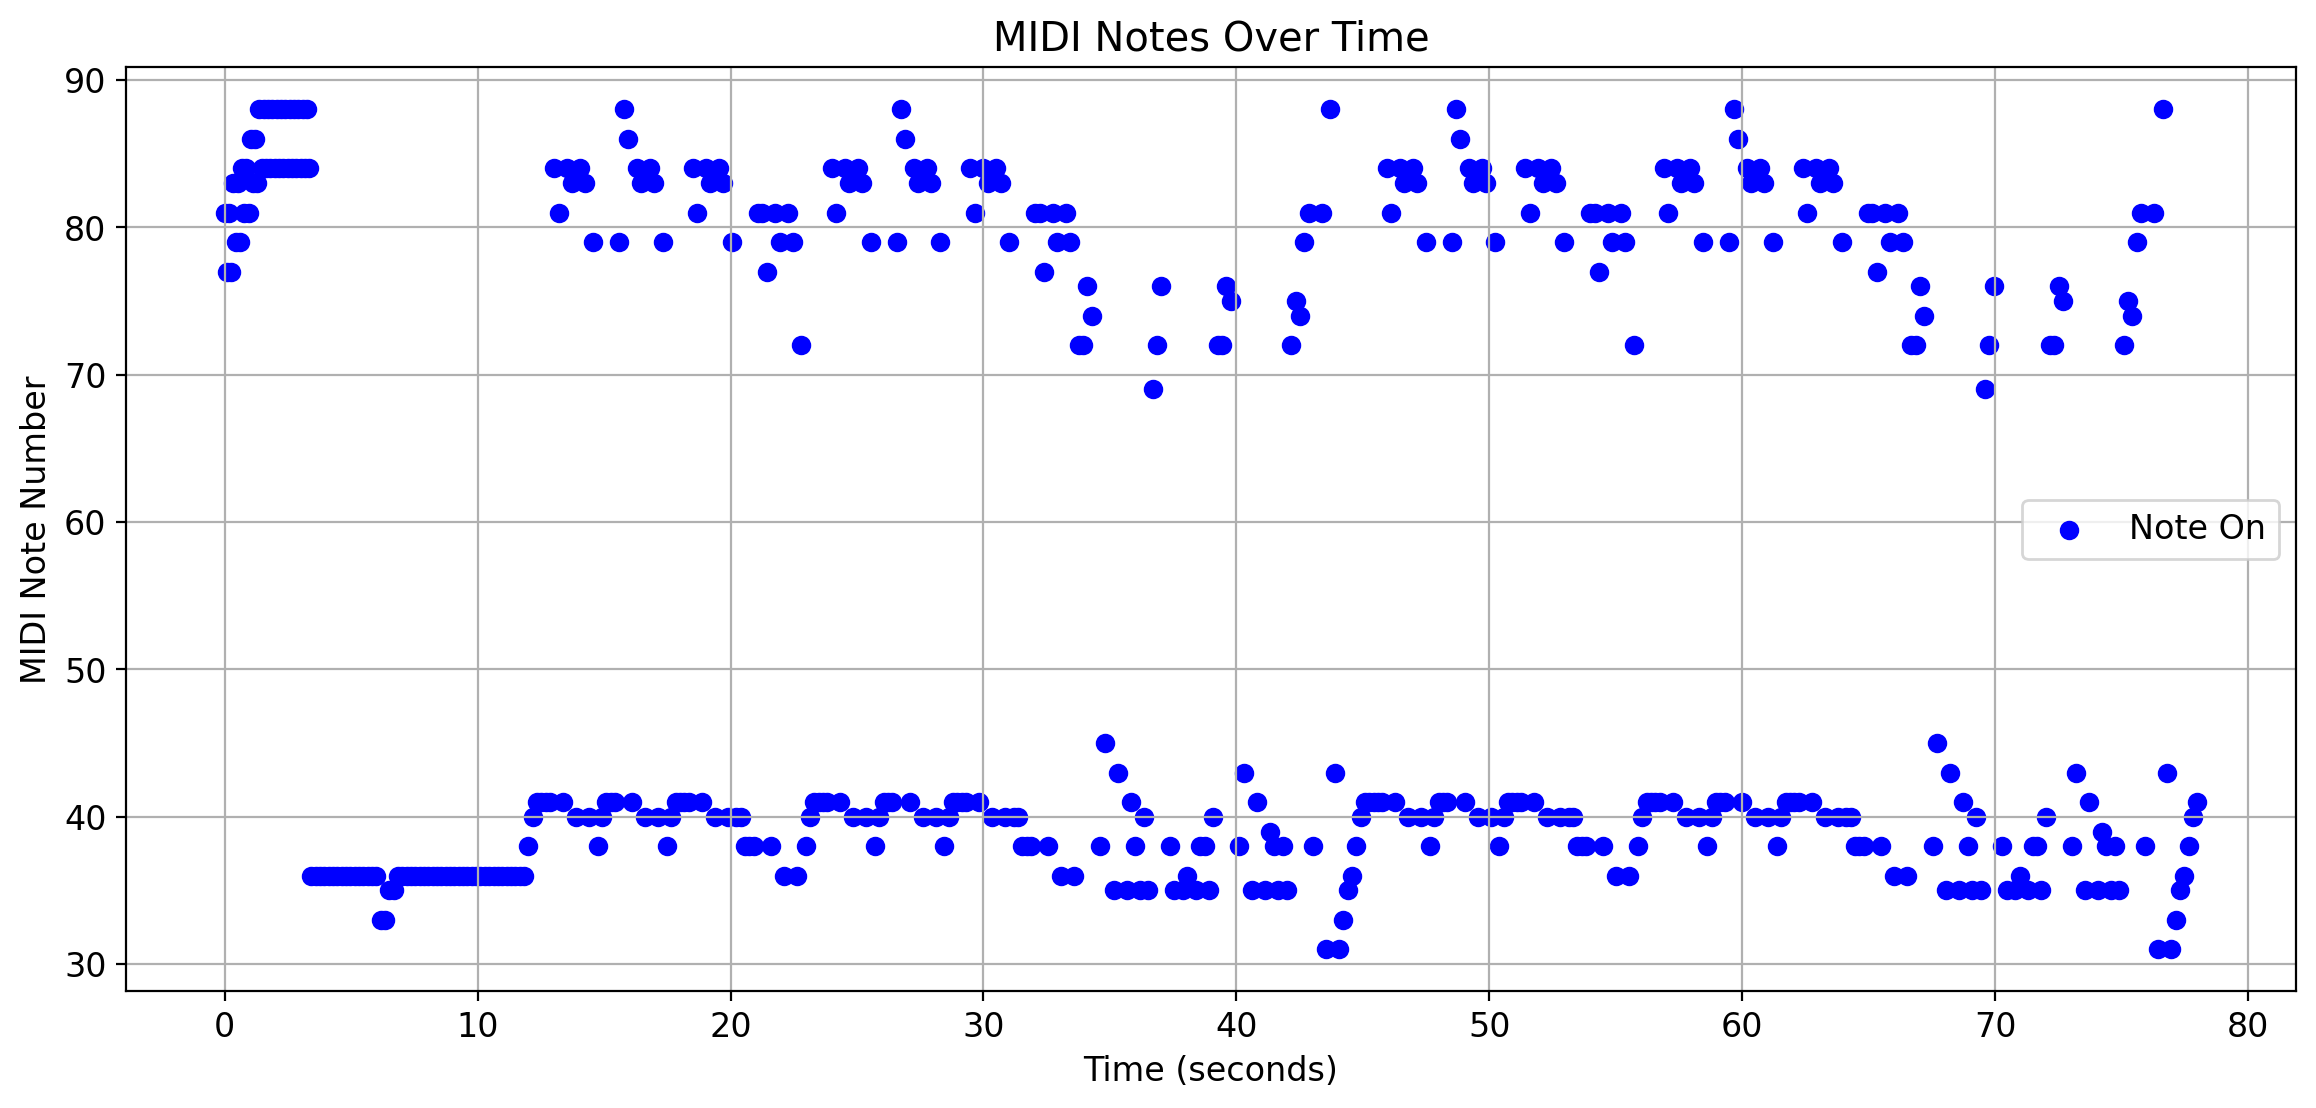

In [234]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the MIDI data from the CSV file
midi_data = pd.read_csv('hello3.csv')

# Extracting note-on events and their corresponding timestamps and notes
# We consider 'note_on' with a non-zero velocity as a note being played

# Filter out note_on events with non-zero velocities
note_on_data = midi_data[(midi_data['msg_type'].str.contains('note_on')) & 
                         (midi_data['Velocities'].str.contains(r'\[([1-9][0-9]*).*\]'))]

# Extract notes and their start times
note_on_data['Notes'] = note_on_data['Notes'].str.extract(r'\[(\d+).*\]').astype(int)
note_on_data = note_on_data[['Sec', 'Notes']]

# Plotting the notes over time
plt.figure(figsize=(14, 6))
plt.scatter(note_on_data['Sec'], note_on_data['Notes'], color='blue', label='Note On')

# Formatting the plot
plt.title('MIDI Notes Over Time')
plt.xlabel('Time (seconds)')
plt.ylabel('MIDI Note Number')
plt.grid(True)
plt.legend()

# Display the plot
plt.show()


C:\ProgramData\anaconda3\envs\my_ai\lib\site-packages\ipykernel_launcher.py:13: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  del sys.path[0]
C:\ProgramData\anaconda3\envs\my_ai\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<Figure size 1400x600 with 0 Axes>

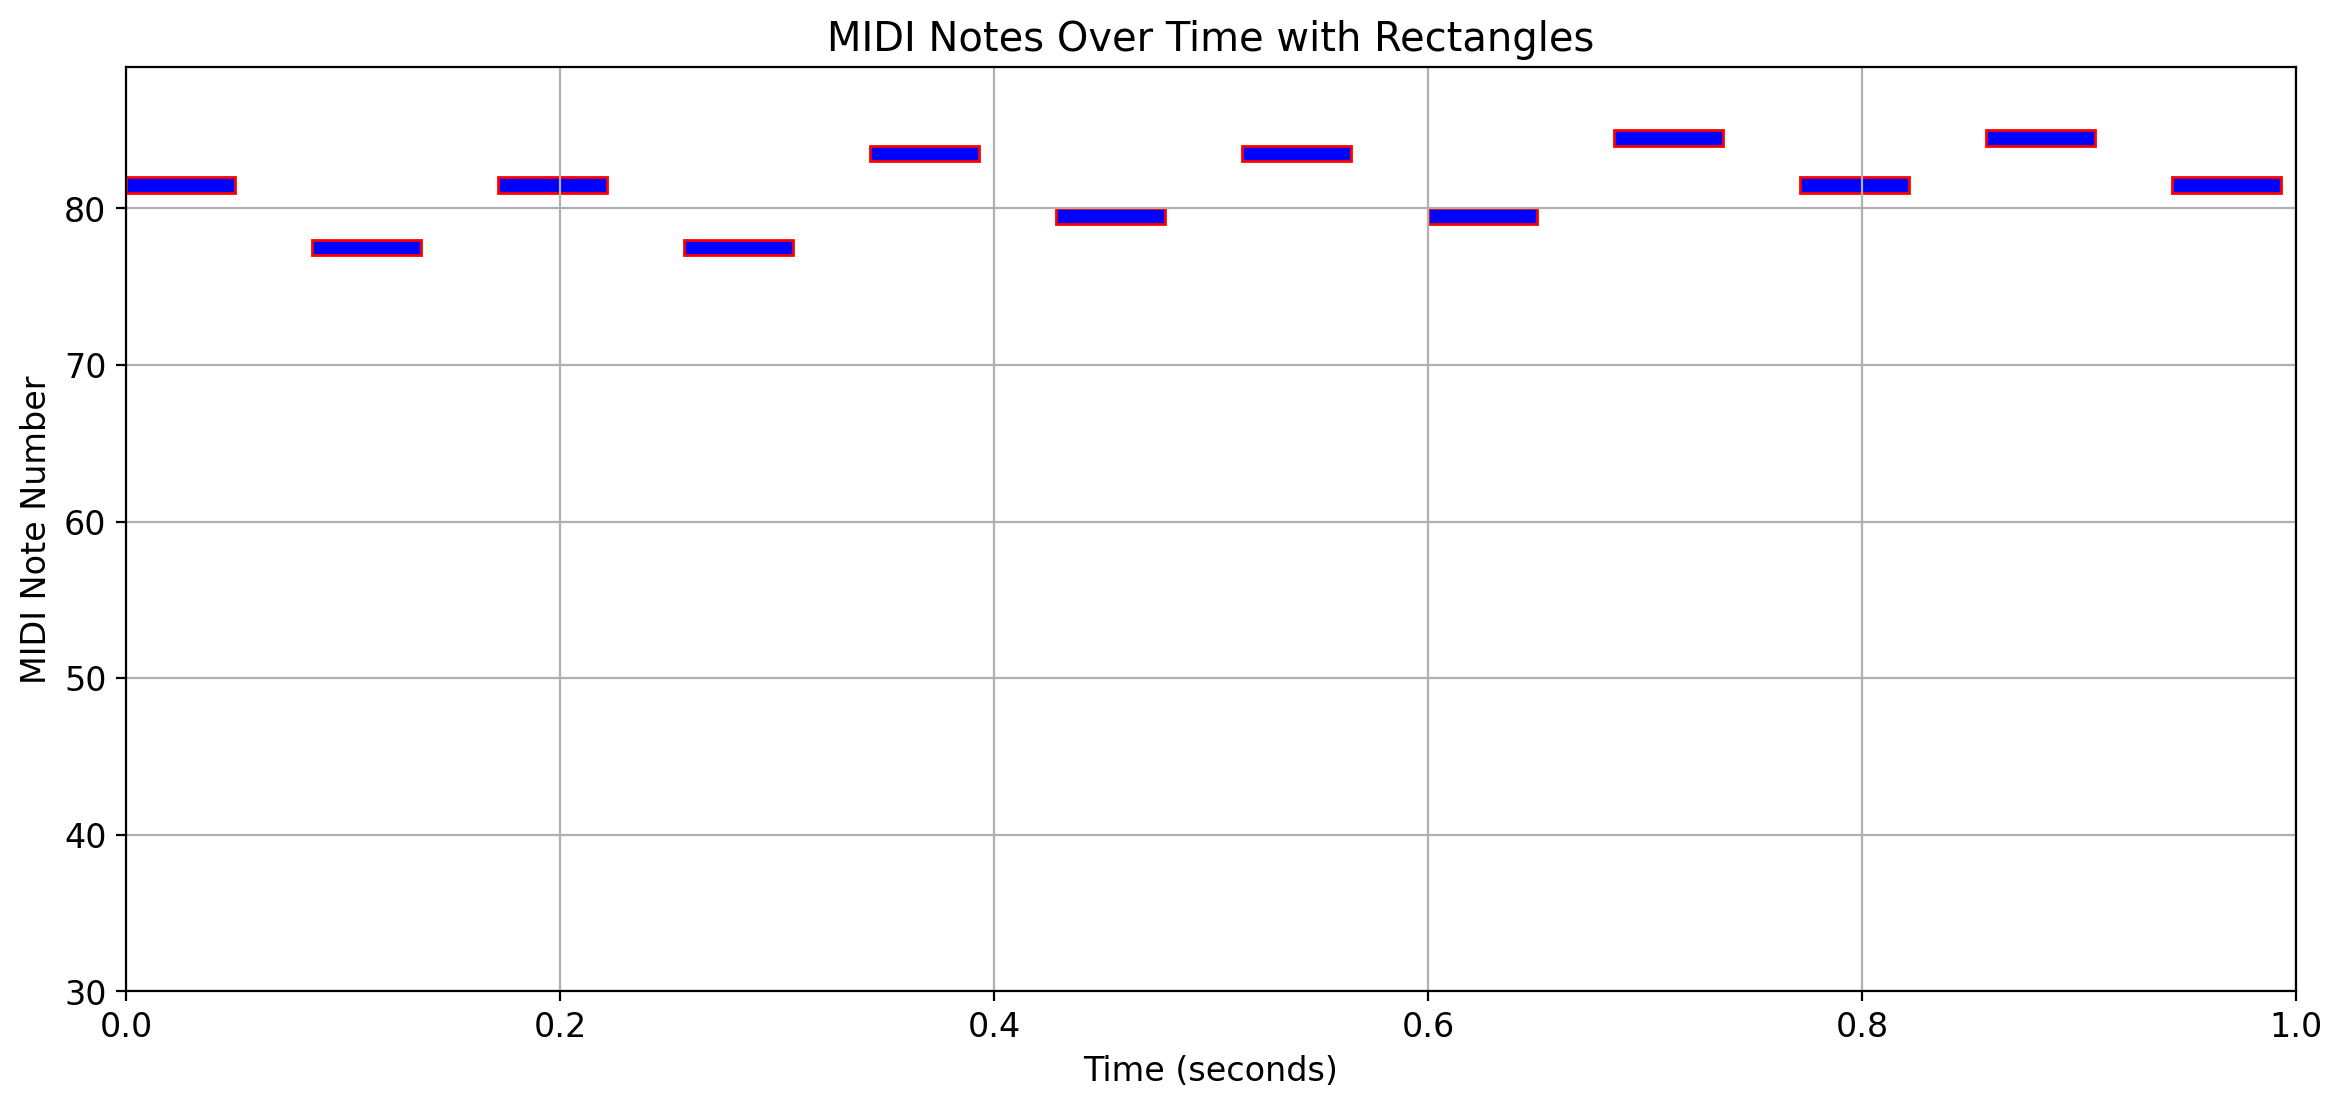

In [236]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd

midi_data = pd.read_csv('hello3.csv')

note_on_data = midi_data[(midi_data['msg_type'].str.contains('note_on')) & 
                         (midi_data['Velocities'].str.contains(r'\[([1-9][0-9]*).*\]'))]

note_on_data['Notes'] = note_on_data['Notes'].str.extract(r'\[(\d+).*\]').astype(int)
note_on_data = note_on_data[['Sec', 'Notes']]

plt.figure(figsize=(14, 6))

fig, ax = plt.subplots(figsize=(14, 6))

default_duration = 0.05 

for index, row in note_on_data.iterrows():
    time = row['Sec']
    note_num = row['Notes']
    ax.add_patch(
        patches.Rectangle(
            (time, note_num),  
            default_duration, 
            1.0,               
            edgecolor='red',
            facecolor='blue',
            fill=True
        )
    )

ax.set_xlabel('Time (seconds)')
ax.set_ylabel('MIDI Note Number')
ax.set_title('MIDI Notes Over Time with Rectangles')


ax.set_ylim(note_on_data['Notes'].min() - 1, note_on_data['Notes'].max() + 1)

plt.grid(True)
plt.show()

In [237]:
import roll
mid = roll.MidiFile("")


roll = roll.mid.get_roll()


mid.draw_roll()


FileNotFoundError: [Errno 2] No such file or directory: ''

In [37]:
# 파이썬 열거형
from enum import Enum

class Note(Enum):
    E11 = 127
    DT11 =126
    D11 = 125
    CT11 =124
    C11 =123
    B10 = 122
    AT10 =121
    A10 = 120
    GT10 =119
    G10 = 118
    FT10 =117
    F10 = 116
    E10 = 115
    DT10 =114
    D10 = 113
    CT10 =112
    C10 =111
    B9 = 110
    AT9 =109
    A9 = 108
    GT9 =107
    G9 = 106
    FT9 =105
    F9 = 104
    E9 = 103
    DT9 =102
    D9 = 101
    CT9 =100
    C9 = 99
    B8 = 98
    AT8 =97
    A8 = 96
    GT8 =95
    G8 = 94
    FT8 =93
    F8 = 92
    E8 = 91
    DT8 =90
    D8 = 89
    CT8 =88
    C8 =87
    B7 = 86
    AT7 = 85
    A7 = 84
    GT7 =83
    G7 = 82
    FT7 =81
    F7 = 80
    E7 = 79
    DT7 =78
    D7 = 77
    CT7 =76
    C7 = 75
    B6 = 74
    AT6 =73
    A6 = 72
    GT6 =71
    G6 = 70
    FT6 =69
    F6 = 68
    E6 = 67
    DT6 =66
    D6 = 65
    CT6 =64
    C6 = 63
    B5 = 62
    AT5 =61
    A5 = 60
    GT5 =59
    G5 = 58
    FT5 =57
    F5 = 56
    E5 = 55
    DT5 =54
    D5 = 53
    CT5 =52
    C5 = 51
    B4 = 50
    AT4 =49
    A4 = 48
    GT4 =47
    G4 = 46
    FT4 =45
    F4 = 44
    E4 = 43
    DT4 =42
    D4 = 41
    CT4 =40
    C4 = 39
    B3 = 38
    AT3 =37
    A3 = 36
    GT3 =35
    G3 = 34
    FT3 =33
    F3 = 32
    E3 = 31
    DT3 =30
    D3 = 29
    CT3 =28
    C3 = 27
    B2 = 26
    AT2 = 25
    A2 = 24
    GT2 = 23
    G2 = 22
    FT2 = 21
    F2 = 20
    E2 = 19
    DT2 = 18
    D2 = 17
    CT2 = 16
    C2 = 15
    B1 = 14
    AT1 = 13
    A1 = 12
    GT1 = 11
    G1 = 10
    FT1 = 9
    F1 = 8
    E1 = 7
    DT1 = 6
    D1 = 5
    CT1 = 4
    C1 = 3
    B0 = 2
    AT0 = 1
    A0 = 0

In [239]:
print(Note.A0)

Note.A0


In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np


class MidiVisualization():
    
    def __init__(self, midiData, midiTestData):
        self.midiData = pd.read_csv(midiData)
        self.midiTestData = pd.read_csv(midiTestData)
    
    def showMidiTargetGraph(self):
        notes_duration_data = pd.DataFrame(columns=['Start', 'End', 'Note'])
        
        for index, row in self.midiData.iterrows():
            if 'note_on' in row['msg_type'] and any(v > 0 for v in eval(row['Velocities'])):

                note = eval(row['Notes'])[0]  
                note_off_data = self.midiData[(self.midiData['Notes'].str.contains(str(note))) & 
                                          (self.midiData['msg_type'].str.contains('note_off')) & 
                                          (self.midiData['Sec'] > row['Sec'])]


                if not note_off_data.empty:
                    end_time = note_off_data.iloc[0]['Sec']
                    notes_duration_data = notes_duration_data.append({
                        'Start': row['Sec'],
                        'End': end_time,
                        'Note': note
                    }, ignore_index=True)
                    
        notes_duration_data['Note'] = notes_duration_data['Note'].astype(int)
        
        fig, ax = plt.subplots(figsize=(30, 30))


        # 정답
        for index, row in notes_duration_data.iterrows():
            duration = row['End'] - row['Start']
            ax.add_patch(
                patches.Rectangle(
                    (row['Start'], row['Note']), 
                    duration,  # width of the rectangle
                    1.0,       # height of the rectangle
                    edgecolor='blue',
                    facecolor='blue',
                    fill=True
                )
            )
        
        ax.set_xlabel('Time')
        ax.set_ylabel('Note')


        ax.set_yticks(np.arange(128), labels=[n for n in Note])
        ax.set_ylim(0,128)
        ax.set_xlim(0, 80)

        plt.grid(True)
        plt.show()
        
    def showMidiInputGraph(self):
        notes_duration_data2 = pd.DataFrame(columns=['Start', 'End', 'Note'])
        
        for index, row in self.midiTestData.iterrows():
            if 'note_on' in row['msg_type'] and any(v > 0 for v in eval(row['Velocities'])):

                note = eval(row['Notes'])[0]  
                note_off_data = self.midiTestData[(self.midiTestData['Notes'].str.contains(str(note))) & 
                                          (self.midiTestData['msg_type'].str.contains('note_off')) & 
                                          (self.midiTestData['Sec'] > row['Sec'])]


                if not note_off_data.empty:
                    end_time = note_off_data.iloc[0]['Sec']
                    notes_duration_data2 = notes_duration_data2.append({
                        'Start': row['Sec'],
                        'End': end_time,
                        'Note': note
                    }, ignore_index=True)
        
        notes_duration_data2['Note'] = notes_duration_data2['Note'].astype(int)
        
        fig, ax = plt.subplots(figsize=(30, 30))
        
            # 테스트
        for index, row in notes_duration_data2.iterrows():
            duration = row['End'] - row['Start']
            ax.add_patch(
                patches.Rectangle(
                    (row['Start'], row['Note']), 
                    duration,  # width of the rectangle
                    1.0,       # height of the rectangle
                    edgecolor='red',
                    facecolor='red',
                    fill=True
                )
            )
        
        ax.set_xlabel('Time')
        ax.set_ylabel('Note')


        ax.set_yticks(np.arange(128), labels=[n for n in Note])
        ax.set_ylim(0,128)
        ax.set_xlim(0, 80)

        plt.grid(True)
        plt.show()
        
    def showMidiGraph(self):

        notes_duration_data = pd.DataFrame(columns=['Start', 'End', 'Note'])
        notes_duration_data2 = pd.DataFrame(columns=['Start', 'End', 'Note'])

        for index, row in self.midiData.iterrows():
            if 'note_on' in row['msg_type'] and any(v > 0 for v in eval(row['Velocities'])):

                note = eval(row['Notes'])[0]  
                note_off_data = self.midiData[(self.midiData['Notes'].str.contains(str(note))) & 
                                          (self.midiData['msg_type'].str.contains('note_off')) & 
                                          (self.midiData['Sec'] > row['Sec'])]


                if not note_off_data.empty:
                    end_time = note_off_data.iloc[0]['Sec']
                    notes_duration_data = notes_duration_data.append({
                        'Start': row['Sec'],
                        'End': end_time,
                        'Note': note
                    }, ignore_index=True)
        
        notes_duration_data['Note'] = notes_duration_data['Note'].astype(int)
        
        for index, row in self.midiTestData.iterrows():
            if 'note_on' in row['msg_type'] and any(v > 0 for v in eval(row['Velocities'])):

                note = eval(row['Notes'])[0]  
                note_off_data = self.midiTestData[(self.midiTestData['Notes'].str.contains(str(note))) & 
                                          (self.midiTestData['msg_type'].str.contains('note_off')) & 
                                          (self.midiTestData['Sec'] > row['Sec'])]


                if not note_off_data.empty:
                    end_time = note_off_data.iloc[0]['Sec']
                    notes_duration_data2 = notes_duration_data2.append({
                        'Start': row['Sec'],
                        'End': end_time,
                        'Note': note
                    }, ignore_index=True)

        notes_duration_data2['Note'] = notes_duration_data2['Note'].astype(int)

        fig, ax = plt.subplots(figsize=(30, 30))


        # 정답
        for index, row in notes_duration_data.iterrows():
            duration = row['End'] - row['Start']
            ax.add_patch(
                patches.Rectangle(
                    (row['Start'], row['Note']), 
                    duration,  # width of the rectangle
                    1.0,       # height of the rectangle
                    edgecolor='blue',
                    facecolor='blue',
                    fill=True
                )
            )

            # 테스트
        for index, row in notes_duration_data2.iterrows():
            duration = row['End'] - row['Start']
            ax.add_patch(
                patches.Rectangle(
                    (row['Start'], row['Note']), 
                    duration,  # width of the rectangle
                    1.0,       # height of the rectangle
                    edgecolor='red',
                    facecolor='red',
                    fill=False
                )
            )

        ax.set_xlabel('Time')
        ax.set_ylabel('Note')


        ax.set_yticks(np.arange(128), labels=[n for n in Note])
        ax.set_ylim(0,128)
        ax.set_xlim(self.midiData['Sec'][0], self.midiData['Sec'][len(self.midiTestData['Sec'])-1])

        plt.grid(True)
        plt.show()


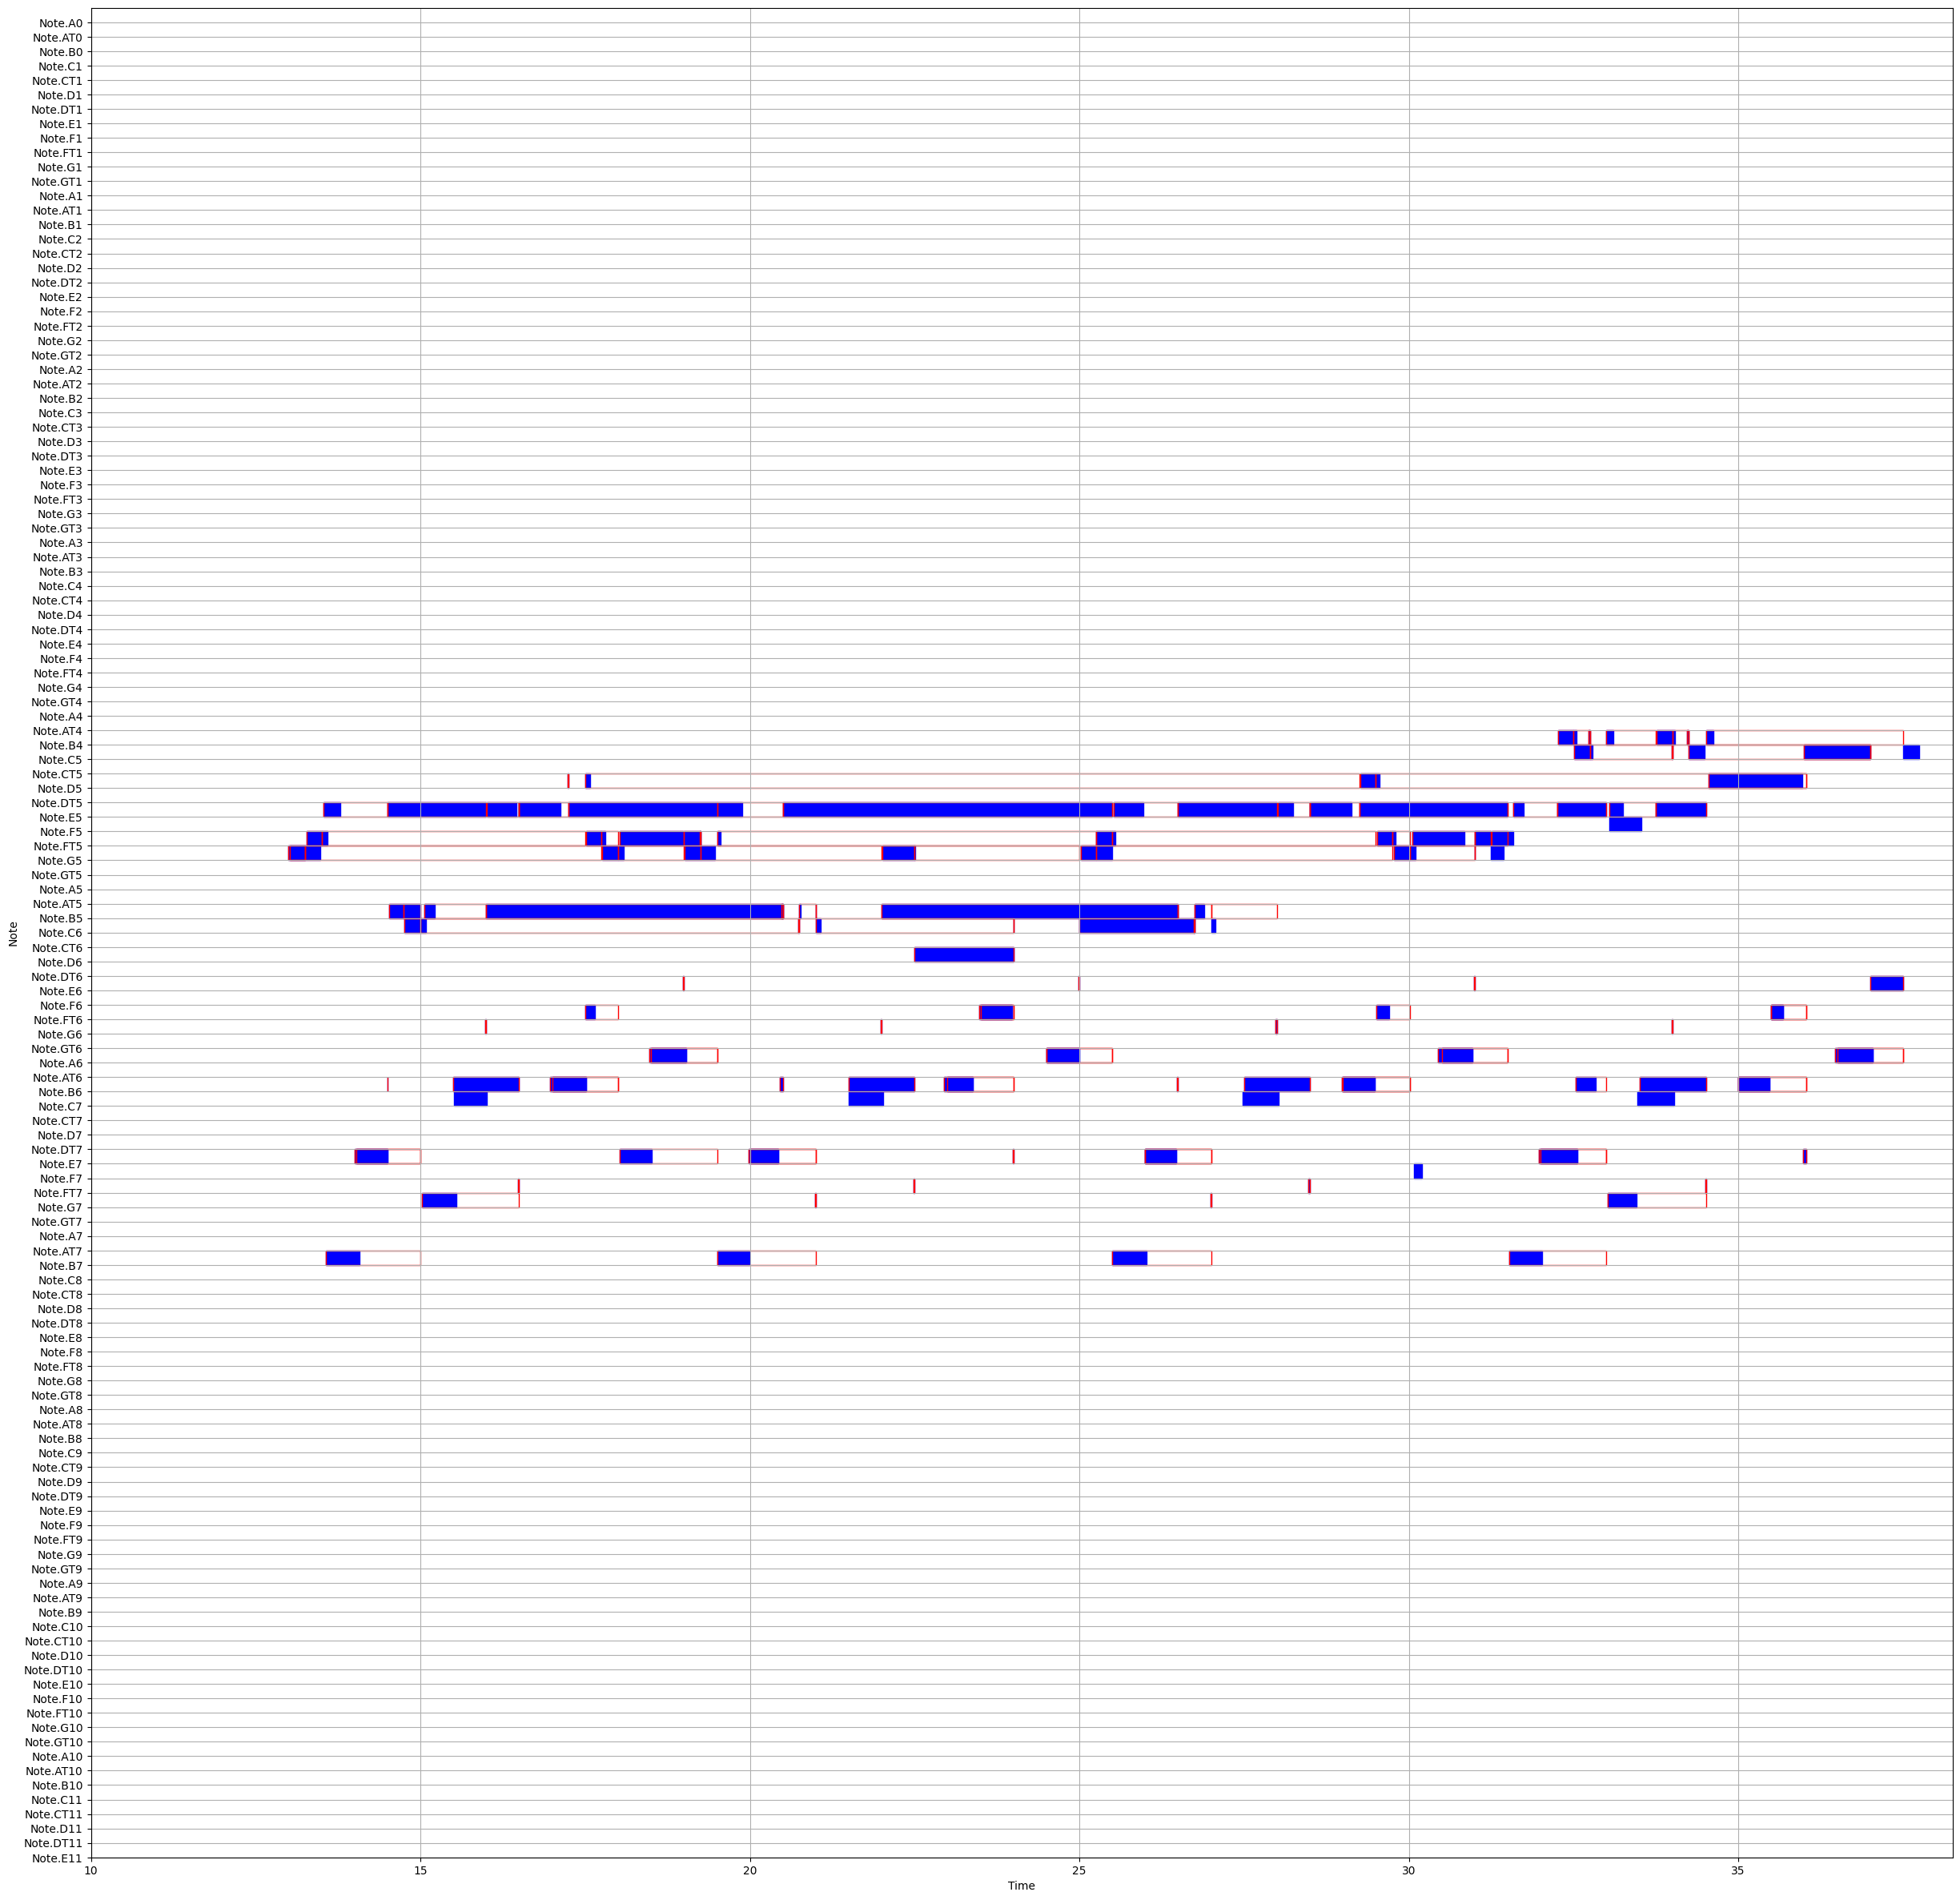

In [67]:
midiVisulization = MidiVisualization('butterfly.csv', 'butteryfly_test.csv')
midiVisulization.showMidiGraph()

# 음정 정확도(비교알고리즘) 시각화

In [74]:
def calculate_note_accuracy(input_file, target_file):
    df_input = pd.read_csv(input_file)
    df_target = pd.read_csv(target_file)

    total_accuracy = 0

    for index in range(len(df_input)):
        notes_input = eval(df_input.at[index, 'Notes'])
        notes_target = eval(df_target.at[index, 'Notes'])

        print('-'*20)
        print(f'입력 데이터: {notes_input}')
        print(f'정답 데이터: {notes_target}')
        print('-'*20)
        
        # 0으로 된 값 리스트로 처리
        if isinstance(notes_input, int):
            notes_input = [notes_input]
        if isinstance(notes_target, int):
            notes_target = [notes_target]
        
        # 현재 행의 정확도 초기화
        row_accuracy = 0

        # 한 행에 있는 리스트들 간의 비교
        for i in range(len(notes_target)):
            for j in range(len(notes_input)):
                if notes_input[j] == notes_target[i]:
                # if abs(notes_input[j] - notes_target[i]) <= 1:  # 허용 범위 고려
                    row_accuracy += 1
                    print('-'*10)
                    print(f'!!!{row_accuracy}점 추가!!!')
                    
                # 비교하는 대상들 출력
                print(f'비교 데이터 - 입력 데이터: {notes_input[j]} / 정답 데이터: {notes_target[i]}')
                print()
        # 한 행의 정확도를 전체 정확도에 추가
        total_accuracy += row_accuracy
        print(f'현재 점수: {total_accuracy}점')
        print()

    # 전체 정확도 계산
    max_possible_accuracy = len(df_input)
    accuracy_percentage = min(100, (total_accuracy / max_possible_accuracy) * 100)
    print('.::::,',max_possible_accuracy)
    print('::::',accuracy_percentage)
    return str(accuracy_percentage)+'%'

In [75]:
input_file = './butterfly_target_data.mid.csv'
target_file = './butterfly_input_data.mid.csv'

accuracy = calculate_note_accuracy(input_file, target_file)
print(f'음정 정확도: {accuracy}')

--------------------
입력 데이터: []
정답 데이터: []
--------------------
현재 점수: 0점

--------------------
입력 데이터: [69]
정답 데이터: [69]
--------------------
----------
!!!1점 추가!!!
비교 데이터 - 입력 데이터: 69 / 정답 데이터: 69

현재 점수: 1점

--------------------
입력 데이터: [69, 70]
정답 데이터: [69]
--------------------
----------
!!!1점 추가!!!
비교 데이터 - 입력 데이터: 69 / 정답 데이터: 69

비교 데이터 - 입력 데이터: 70 / 정답 데이터: 69

현재 점수: 2점

--------------------
입력 데이터: [70, 41, 72]
정답 데이터: [69, 70]
--------------------
비교 데이터 - 입력 데이터: 70 / 정답 데이터: 69

비교 데이터 - 입력 데이터: 41 / 정답 데이터: 69

비교 데이터 - 입력 데이터: 72 / 정답 데이터: 69

----------
!!!1점 추가!!!
비교 데이터 - 입력 데이터: 70 / 정답 데이터: 70

비교 데이터 - 입력 데이터: 41 / 정답 데이터: 70

비교 데이터 - 입력 데이터: 72 / 정답 데이터: 70

현재 점수: 3점

--------------------
입력 데이터: [48]
정답 데이터: [70]
--------------------
비교 데이터 - 입력 데이터: 48 / 정답 데이터: 70

현재 점수: 3점

--------------------
입력 데이터: [72, 53, 65]
정답 데이터: [69]
--------------------
비교 데이터 - 입력 데이터: 72 / 정답 데이터: 69

비교 데이터 - 입력 데이터: 53 / 정답 데이터: 69

비교 데이터 - 입력 데이터: 65 / 정답 데이터: 69

현재 점수:

In [69]:
def calculate_note_accuracy(input_file, target_file):
    df_input = pd.read_csv(input_file)
    df_target = pd.read_csv(target_file)

    total_accuracy = 0

    for index in range(len(df_input)):
        notes_input = eval(df_input.at[index, 'Notes'])
        notes_target = eval(df_target.at[index, 'Notes'])

        # 0으로 된 값 리스트로 처리
        if isinstance(notes_input, int):
            notes_input = [notes_input]
        if isinstance(notes_target, int):
            notes_target = [notes_target]
        
        # 현재 행의 정확도 초기화
        row_accuracy = 0

        # 한 행에 있는 리스트들 간의 비교
        for i in range(len(notes_target)):
            for j in range(len(notes_input)):
                if notes_input[j] == notes_target[i]:
                    row_accuracy += 1
                    
        total_accuracy += row_accuracy

    # 전체 정확도 계산
    max_possible_accuracy = len(df_input)
    accuracy_percentage = min(100, (total_accuracy / max_possible_accuracy) * 100)

    return f'{accuracy_percentage:.2f}%'

In [71]:
note_score1 = calculate_note_accuracy('./butterfly_target_data.mid.csv', './butterfly_input_data.mid.csv')

In [72]:
print(note_score1)

35.29%


In [116]:
csv_path = '../Downloads/she_target_data.csv'
csv2_path = '../Downloads/she_input_data.csv'
import pandas as pd

df = pd.read_csv(csv_path)
df2 = pd.read_csv(csv2_path)


In [117]:
for i in range(len(df)-1):
    if df['note'][i] == df['note'][i+1] or df['msg_type'][i] == '[]':
        df = df.drop(i)

for i in range(len(df2)-1):
    if df2['note'][i] == df2['note'][i+1] or df2['msg_type'][i] == '[]':
        df2 = df2.drop(i)

In [120]:
df.to_csv('target.csv')

In [121]:
df2.to_csv('input.csv')

# midi visualization V2

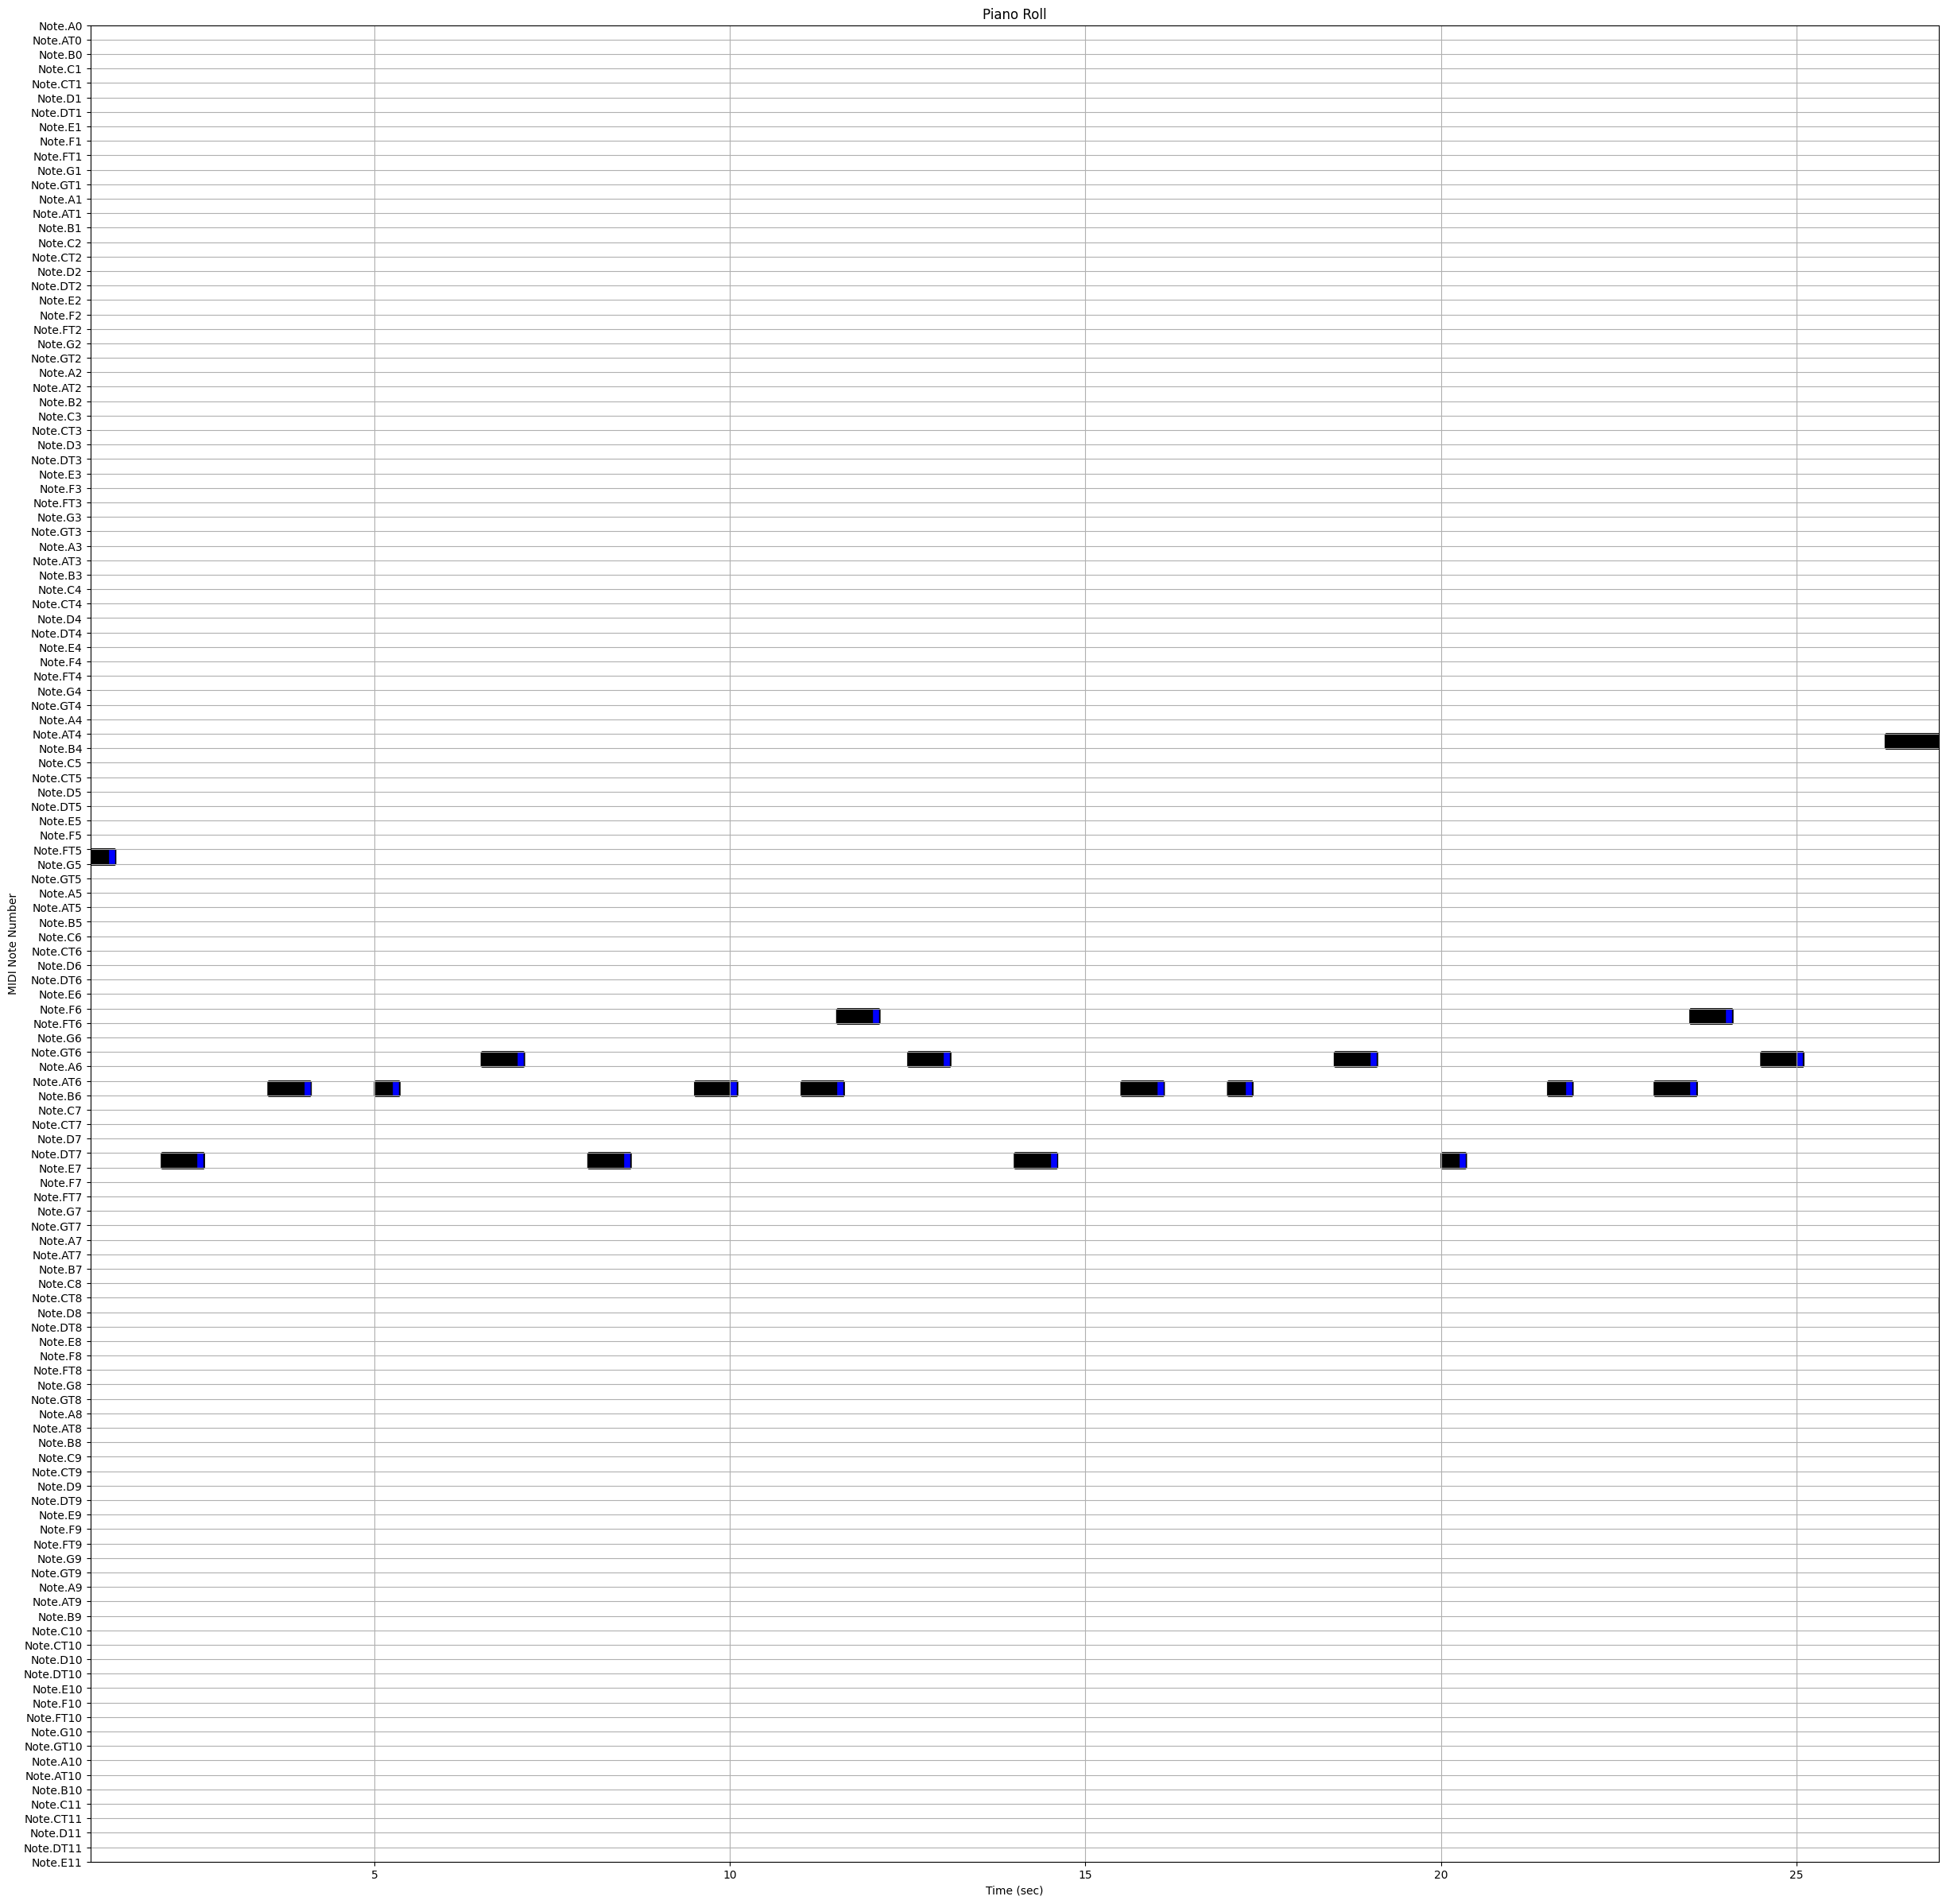

In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.collections as collections

def plot_piano_roll(csv_file_path):
    # Load the CSV data into a DataFrame
    note_on_data = pd.read_csv(csv_file_path)
    
    # Convert 'sec' to float and 'note' to int, coercing errors to NaN
    note_on_data['sec'] = pd.to_numeric(note_on_data['sec'], errors='coerce')
    note_on_data['note'] = pd.to_numeric(note_on_data['note'].astype(str).str.strip('[]'), errors='coerce')
    
    # Drop rows where 'sec' or 'note' could not be converted to numeric
    note_on_data = note_on_data.dropna(subset=['sec', 'note'])
    
    # Ensure 'note' is an integer
    note_on_data['note'] = note_on_data['note'].astype(int)
    
    # Prepare rectangles for plotting (x, y, width, height)
    note_rectangles = []
    note_duration = 0.1  # arbitrary short duration for visualization

    for index, row in note_on_data.iterrows():
        note_rectangles.append((row['sec'], row['note'], note_duration, 1))

    # Create the PatchCollection
    note_collection = collections.PatchCollection(
        [plt.Rectangle(xy=(x, y), width=width, height=height) for x, y, width, height in note_rectangles],
        facecolor='blue', edgecolor='black'
    )
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(30, 30))
    ax.add_collection(note_collection)
    
    # Set the plot limits
    ax.set_xlim(note_on_data['sec'].min(), note_on_data['sec'].max())
    ax.set_ylim(0, 127)
    
    ax.set_yticks(np.arange(128), labels=[n for n in Note])
    # Label the axes and set the title
    ax.set_xlabel('Time (sec)')
    ax.set_ylabel('MIDI Note Number')
    ax.set_title('Piano Roll')
    
    # Add a grid
    ax.grid(True)
    
    # Display the plot
    plt.show()

# Replace 'path_to_your_csv.csv' with the path to your actual CSV file
csv_file_path = './midi_data/butterfly_target_data.csv'
plot_piano_roll(csv_file_path)


# matplotlib 실시간 그래프 그리기

In [ ]:
import matplotlib.pyplot as plt
import random
import time

# 그래프 초기 설정
plt.ion()

# 그래프 생성
fig, ax = plt.subplots()

# 초기 데이터
x_data = [1,2,3,4,5,6,7,8,9,10]
y_data = [1,2,3,4,5,6,7,8,9,10]

while True:
    # 데이터 갱신
    x = time.time()
    y = random.randint(0, 100)

    x_data.append(x)
    y_data.append(y)

    # 그래프 업데이트
    ax.clear()
    ax.plot(x_data, y_data)

    # 그래프 축 설정 (예: 10초 이내 데이터만 표시)
    ax.set_xlim(x - 10, x)
    ax.set_ylim(min(y_data), max(y_data))

    # 그래프 보여주기
    plt.show()
    plt.pause(0.1)

In [6]:
import mido

mid = mido.MidiFile('test_bpm_v2.mid')

In [7]:
mid.tracks

[MidiTrack([
   MetaMessage('track_name', name='butterfly', time=0),
   MetaMessage('time_signature', numerator=4, denominator=4, clocks_per_click=24, notated_32nd_notes_per_beat=8, time=0),
   MetaMessage('set_tempo', tempo=500521, time=0),
   MetaMessage('set_tempo', tempo=501567, time=480),
   MetaMessage('set_tempo', tempo=502618, time=480),
   MetaMessage('set_tempo', tempo=503672, time=480),
   MetaMessage('set_tempo', tempo=504732, time=480),
   MetaMessage('set_tempo', tempo=505795, time=480),
   MetaMessage('set_tempo', tempo=506863, time=480),
   MetaMessage('set_tempo', tempo=507936, time=480),
   MetaMessage('set_tempo', tempo=509014, time=480),
   MetaMessage('set_tempo', tempo=510095, time=480),
   MetaMessage('set_tempo', tempo=511182, time=480),
   MetaMessage('set_tempo', tempo=512273, time=480),
   MetaMessage('set_tempo', tempo=529397, time=480),
   MetaMessage('set_tempo', tempo=565591, time=480),
   MetaMessage('set_tempo', tempo=607098, time=480),
   MetaMessage('

In [16]:
import mido

mid = mido.MidiFile('modified_midi_file.mid')

mid.tracks

[MidiTrack([
   MetaMessage('track_name', name='butterfly', time=0),
   MetaMessage('time_signature', numerator=4, denominator=4, clocks_per_click=24, notated_32nd_notes_per_beat=8, time=0),
   MetaMessage('set_tempo', tempo=500521, time=0),
   MetaMessage('set_tempo', tempo=500000, time=480),
   MetaMessage('set_tempo', tempo=501567, time=480),
   MetaMessage('set_tempo', tempo=500000, time=480),
   MetaMessage('set_tempo', tempo=502618, time=480),
   MetaMessage('set_tempo', tempo=500000, time=480),
   MetaMessage('set_tempo', tempo=503672, time=480),
   MetaMessage('set_tempo', tempo=500000, time=480),
   MetaMessage('set_tempo', tempo=504732, time=480),
   MetaMessage('set_tempo', tempo=500000, time=480),
   MetaMessage('set_tempo', tempo=505795, time=480),
   MetaMessage('set_tempo', tempo=500000, time=480),
   MetaMessage('set_tempo', tempo=506863, time=480),
   MetaMessage('set_tempo', tempo=500000, time=480),
   MetaMessage('set_tempo', tempo=507936, time=480),
   MetaMessage('

In [15]:

import mido
from mido import MidiFile, MidiTrack, MetaMessage

# MIDI 파일 로드
midi_file = MidiFile('test_bpm_v2.mid')

bpm = 120
tempo = mido.bpm2tempo(bpm)


set_tempo_message = MetaMessage('set_tempo', tempo=tempo, time=480)



weight = 0

for i in range(3,10):
    midi_file.tracks[0].insert(i+weight, set_tempo_message)
    weight+=1
    

midi_file.save('modified_midi_file.mid')
